<a href="https://colab.research.google.com/github/theMaxiiim/DataFest2025/blob/main/DataFest2025_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
leases = pd.read_csv("Leases.csv", index_col=18)
leases.head()

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
costarID,,,,,,,,,,,,,,,,,,,,,
445509,2018,Q1,1.0,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
436994,2018,Q1,1.0,Atlanta,100 City View,Atlanta_Northwest_Atlanta_100 City View_3330 C...,3330 Cumberland Blvd,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
434890,2018,Q1,1.0,Atlanta,1000 Parkwood,Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...,1000 Parkwood Cir SE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
434720,2018,Q1,1.0,Atlanta,1100 Circle 75,Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...,1100 Circle 75 Pky SE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742.0
437562,2018,Q1,1.0,Atlanta,1200 Ashwood,Atlanta_Central Perimeter_Atlanta_1200 Ashwood...,1200 Ashwood Pky,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0


In [5]:
leases.describe()

,year,monthsigned,zip,leasedSF,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
count,194685.000000,193822.000000,194684.000000,1.946850e+05,1.455410e+05,1.455410e+05,145541.000000,145541.000000,145541.000000,1.216740e+05,121674.000000,121674.000000,121674.000000,1.216740e+05,121674.000000,121674.000000,121674.000000,1.455410e+05
mean,2020.897116,6.398458,54834.565671,7.418951e+03,8.734066e+07,1.761325e+07,0.205129,37.162132,39.730471,1.516990e+07,0.090624,38.532872,41.348356,3.067042e+06,0.017164,32.218578,34.264252,1.327221e+06
std,2.053467,3.415922,32228.307406,2.366310e+04,5.975856e+07,1.178294e+07,0.059300,16.183660,16.430368,9.717183e+06,0.035829,17.322360,17.641388,2.875391e+06,0.011111,13.148892,12.922946,1.234172e+06
min,2018.000000,1.000000,1420.000000,1.000000e+00,2.010185e+07,1.782779e+06,0.057300,16.957171,18.749409,1.544029e+06,0.021800,18.009119,19.990075,1.108040e+05,0.001700,14.149920,16.865199,5.520300e+04
25%,2019.000000,3.000000,22102.000000,1.265000e+03,4.641436e+07,8.345927e+06,0.165001,25.050378,28.860444,7.436069e+06,0.064500,25.717730,29.429358,9.483450e+05,0.008600,23.251198,24.678567,5.355900e+05
50%,2021.000000,6.000000,60607.000000,2.578000e+03,6.585438e+07,1.415498e+07,0.197558,32.582522,34.004225,1.218762e+07,0.082600,33.578010,35.731458,1.680762e+06,0.014000,28.384836,30.803734,8.893690e+05
75%,2023.000000,9.000000,85004.000000,5.818000e+03,1.153246e+08,2.345972e+07,0.247710,43.667669,44.548462,2.121029e+07,0.109500,46.645537,46.250885,4.512948e+06,0.024200,38.640250,39.026963,1.660927e+06
max,2024.000000,12.000000,98499.000000,1.463234e+06,2.683833e+08,5.457790e+07,0.414977,94.191224,84.746663,4.092899e+07,0.190500,99.642941,88.438174,1.435339e+07,0.074600,86.324412,81.205996,9.393220e+06


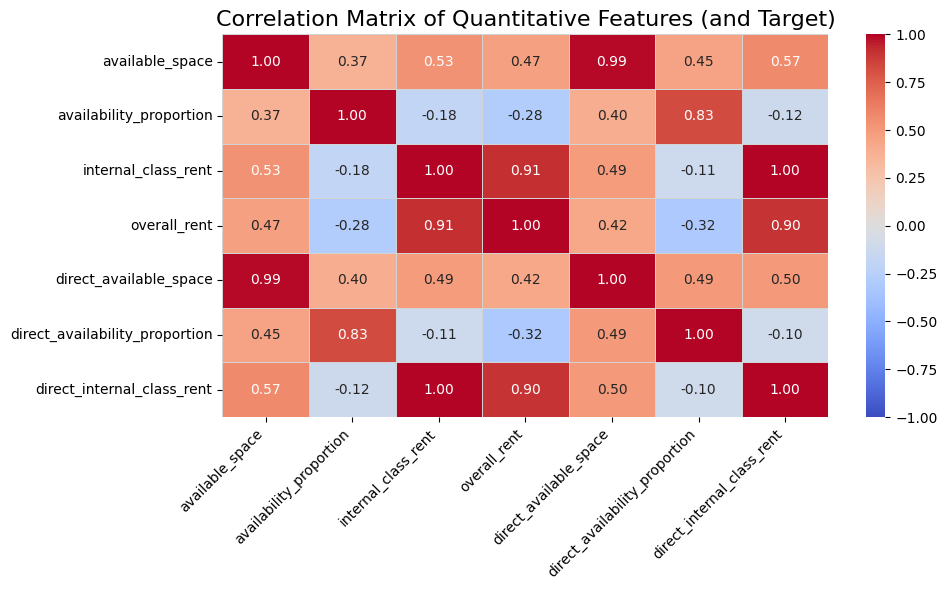

In [6]:
quantitative_cols = ['available_space','availability_proportion','internal_class_rent','overall_rent','direct_available_space','direct_availability_proportion','direct_internal_class_rent']

quantitative_cols = [col for col in quantitative_cols if col in leases.columns]

correlation_matrix = leases[quantitative_cols].corr()

plt.figure(figsize=(10, 6))

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=.5,
    linecolor='lightgray',
    vmin=-1,
    vmax=1
)

plt.title('Correlation Matrix of Quantitative Features (and Target)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [ ]:
leases = pd.read_csv("Leases_1.csv")
cpi_data = pd.read_csv("Inflation.csv")

In [5]:
print(cpi_data.columns)

Index(['Month', 'year', 'All items', 'Food', 'Food at home',
       'Food away from home', 'Energy', 'Gasoline (all types)', 'Electricity',
       'Natural gas (piped)', 'All items less food and energy',
       'Commodities less food and energy commodities', 'Apparel',
       'New vehicles', 'Medical care commodities',
       'Services less energy services', 'Shelter', 'Medical care services',
       'Education and communication'],
      dtype='object')


In [7]:
#normalized for 2018
base_cpi = cpi_data.loc[cpi_data['year'] == 2018, 'All items'].values[0]
cpi_data['CPI_normalized'] = (cpi_data['All items'] / base_cpi) * 100

In [8]:
#normalization 2018
bas_price = leases.loc[leases['year'] == 2018, 'avg_price_perSF'].values[0]
leases['avg_price_perSF_normalized'] = (leases['avg_price_perSF'] / bas_price) * 100

In [9]:
merged_df = pd.merge(leases, cpi_data, on='year')

In [11]:
print(merged_df.columns)


Index(['year', 'monthsigned', 'quarter', 'region', 'internal_class',
       'CBD_suburban', 'leasing', 'market', 'city', 'state', 'zip',
       'transaction_type', 'leasedSF', 'overall_rent', 'internal_class_rent',
       'avg_price_perSF', 'Inflation_All_Items', 'avg_price_perSF_normalized',
       'Month', 'All items', 'Food', 'Food at home', 'Food away from home',
       'Energy', 'Gasoline (all types)', 'Electricity', 'Natural gas (piped)',
       'All items less food and energy',
       'Commodities less food and energy commodities', 'Apparel',
       'New vehicles', 'Medical care commodities',
       'Services less energy services', 'Shelter', 'Medical care services',
       'Education and communication', 'CPI_normalized'],
      dtype='object')


In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='year', y='CPI_normalized', label='CPI (Normalized)')
sns.lineplot(data=merged_df, x='year', y='avg_price_perSF_normalized', label='Avg Lease Price per SF (Normalized)')
plt.xticks(rotation=45)
plt.title('Normalized CPI vs. Average Lease Price per SF (2018-2024)')
plt.xlabel('year')
plt.ylabel('Index (2018 = 100)')
plt.legend()
plt.tight_layout()
plt.show()

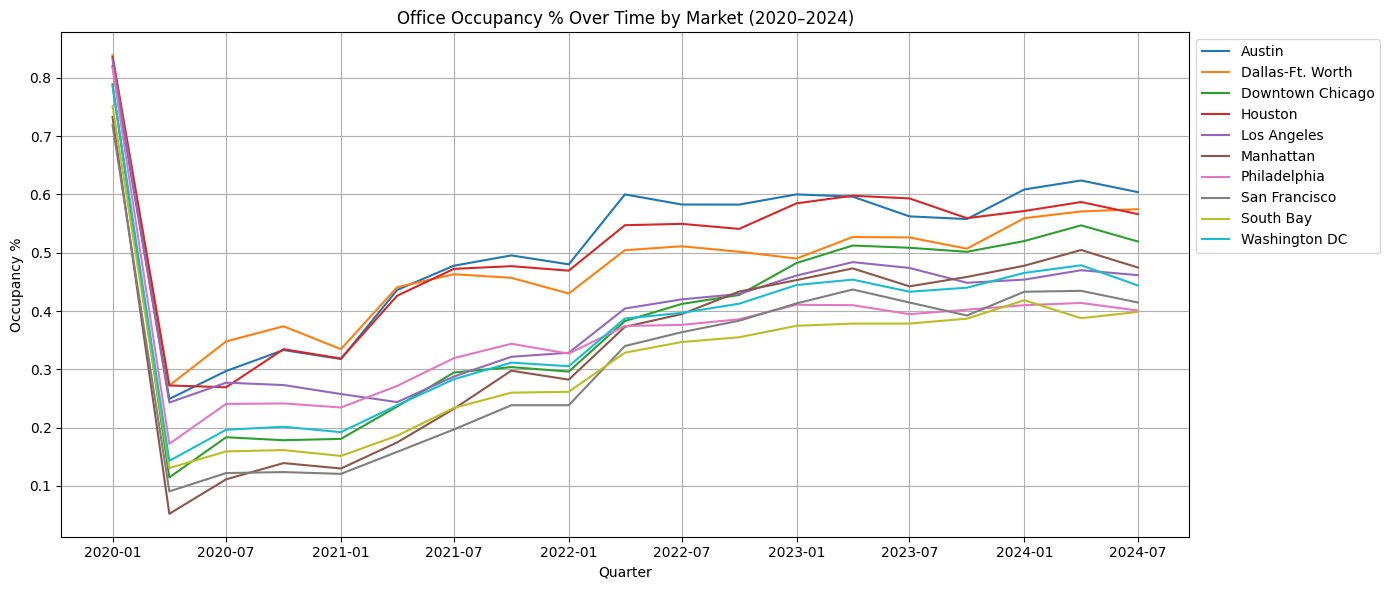

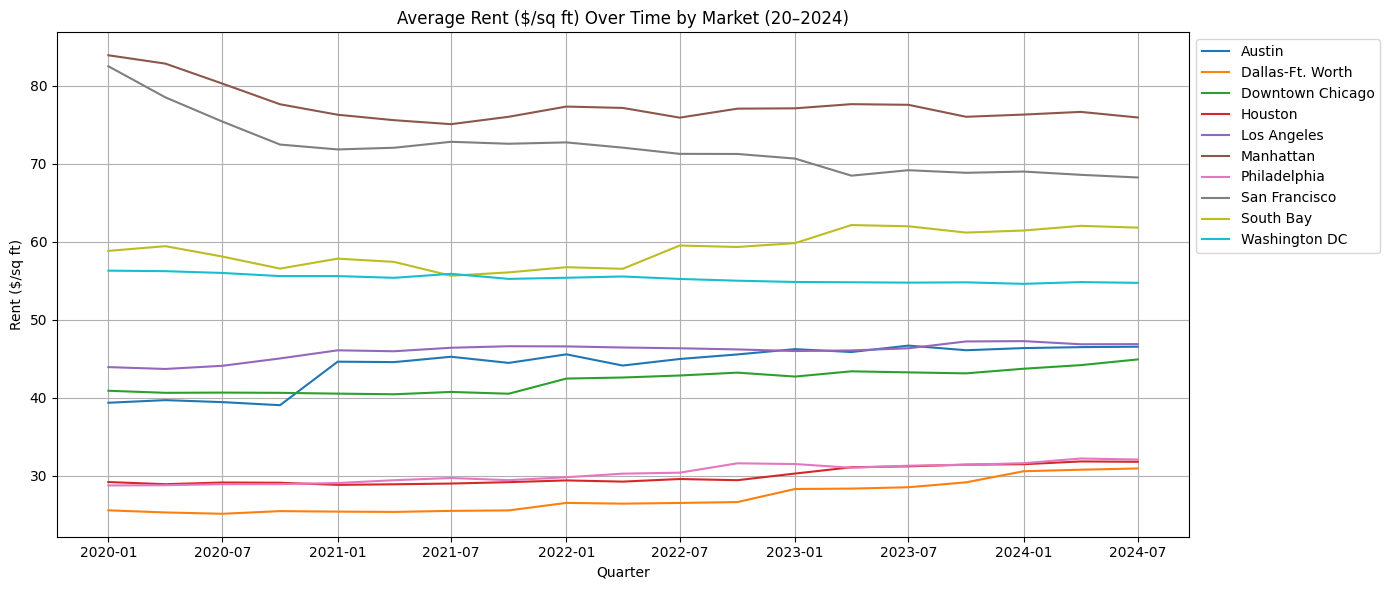

   market  year  total_rent_cost     used_cost   wasted_cost
0  Austin  2020     1.355865e+08  6.959446e+07  6.599209e+07
1  Austin  2021     2.788241e+08  1.278157e+08  1.510084e+08
2  Austin  2022     2.398222e+08  1.314017e+08  1.084205e+08
3  Austin  2023     1.836410e+08  1.058219e+08  7.781915e+07
4  Austin  2024     1.476428e+08  9.022658e+07  5.741617e+07


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

occupancy_df = pd.read_csv("Major Market Occupancy Data-revised.csv")
rent_df = pd.read_csv("Price and Availability Data.csv")
leases_df = pd.read_csv("Leases.csv")

occupancy_df.columns = occupancy_df.columns.str.lower().str.strip()
rent_df.columns = rent_df.columns.str.lower().str.strip()
leases_df.columns = leases_df.columns.str.lower().str.strip()

# Market name alignment
market_mapping = {
    'Washington D.C.': 'Washington DC',
    'Chicago': 'Downtown Chicago',
    'Dallas/Ft Worth': 'Dallas-Ft. Worth',
    'South Bay/San Jose': 'South Bay'
}
occupancy_df['market'] = occupancy_df['market'].replace(market_mapping)
leases_df['market'] = leases_df['market'].replace(market_mapping)

# rename columns
occupancy_df = occupancy_df[['market', 'year', 'quarter', 'avg_occupancy_proportion']]
rent_df = rent_df[['market', 'year', 'quarter', 'overall_rent']]
occupancy_df.rename(columns={'avg_occupancy_proportion': 'occupancy_pct'}, inplace=True)

#Aggregate and merge
occupancy_grouped = occupancy_df.groupby(['market', 'year', 'quarter']).mean().reset_index()
rent_grouped = rent_df.groupby(['market', 'year', 'quarter']).mean().reset_index()
merged = pd.merge(occupancy_grouped, rent_grouped, on=['market', 'year', 'quarter'])

#Convert to datetime
merged['date'] = merged.apply(
    lambda row: pd.Period(f"{row['year']}{row['quarter']}", freq='Q').start_time, axis=1
)
merged = merged[(merged['date'] >= '2018-01-01') & (merged['date'] <= '2024-12-31')]

# ---------------------- Plot: Occupancy ----------------------
plt.figure(figsize=(14, 6))
for market in merged['market'].unique():
    market_data = merged[merged['market'] == market].sort_values('date')
    plt.plot(market_data['date'], market_data['occupancy_pct'], label=market)

plt.title("Office Occupancy % Over Time by Market (2020–2024)")
plt.xlabel("Quarter")
plt.ylabel("Occupancy %")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------- Plot: Rent ----------------------
plt.figure(figsize=(14, 6))
for market in merged['market'].unique():
    market_data = merged[merged['market'] == market].sort_values('date')
    plt.plot(market_data['date'], market_data['overall_rent'], label=market)

plt.title("Average Rent ($/sq ft) Over Time by Market (20–2024)")
plt.xlabel("Quarter")
plt.ylabel("Rent ($/sq ft)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------- Cost/Waste Analysis ----------------------

leased_sf_grouped = leases_df.groupby(['market', 'year', 'quarter'])['leasedsf'].sum().reset_index()

merged_cost = pd.merge(merged, leased_sf_grouped, on=['market', 'year', 'quarter'], how='inner')

merged_cost['total_rent_cost'] = merged_cost['leasedsf'] * merged_cost['overall_rent']
merged_cost['used_cost'] = merged_cost['total_rent_cost'] * merged_cost['occupancy_pct']
merged_cost['wasted_cost'] = merged_cost['total_rent_cost'] - merged_cost['used_cost']

merged_cost['year'] = pd.DatetimeIndex(merged_cost['date']).year

annual_waste = merged_cost.groupby(['market', 'year'])[
    ['total_rent_cost', 'used_cost', 'wasted_cost']
].sum().reset_index()

# Show result
print(annual_waste.head())
